# Twitter Airline Sentiment Analysis

The data is taken from [![Static Badge](https://img.shields.io/badge/Twitter_Airline_Sentiment-blue?logo=kaggle&logoColor=white&logoSize=auto&color=blue)](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment)



## Import Libraries

In [1]:
# common python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 

project_path = "../"

## Import Data

In [3]:
data_path = os.path.join(project_path, "data/Tweets.csv")
data = pd.read_csv(data_path, sep=",")

## EDA

In [4]:
data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

since the focus is text sentiment analysis the columns that would be used is only `text` and `airline_sentiment`

### Check Missing Values

In [ ]:
is_na = pd.DataFrame(data.isna().sum())
is_na.columns = ["Number_Missing"]
is_na["Missing_Percentage"] = (is_na["Number_Missing"] / len(data) * 100)
print(is_na)

                              Number_Missing  Missing_Percentage
tweet_id                                   0            0.000000
airline_sentiment                          0            0.000000
airline_sentiment_confidence               0            0.000000
negativereason                          5462           37.308743
negativereason_confidence               4118           28.128415
airline                                    0            0.000000
airline_sentiment_gold                 14600           99.726776
name                                       0            0.000000
negativereason_gold                    14608           99.781421
retweet_count                              0            0.000000
text                                       0            0.000000
tweet_coord                            13621           93.039617
tweet_created                              0            0.000000
tweet_location                          4733           32.329235
user_timezone            

### Duplicated Data

In [9]:
data.duplicated().sum()

np.int64(36)

### Class Distribution

Text(0.5, 1.0, 'Class Distribution')

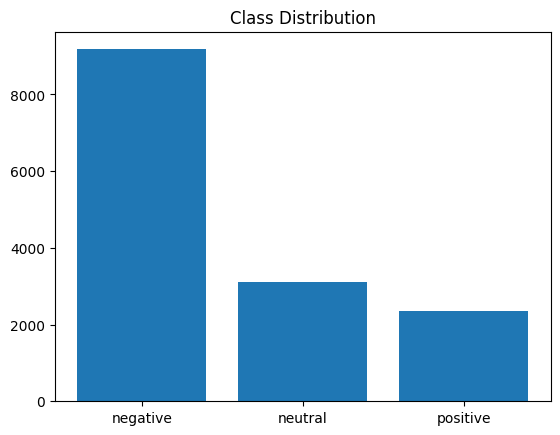

In [16]:
counts = data["airline_sentiment"].value_counts(dropna=False)  # Get the count values
counts.index = counts.index.astype(str)

plt.bar(counts.index, counts)
plt.title("Class Distribution")

//TODO:
- Text length
- Word Frequency Analysis
- Sentiment Specific Words
- N-Grams